In [1]:
# prompt: create a model for lstm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

# Define the model parameters
vocab_size = 10000  # Example: size of your vocabulary
embedding_dim = 128 # Example: dimension of word embeddings
lstm_units = 64     # Example: number of LSTM units
max_length = 100    # Example: maximum sequence length

# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=lstm_units, return_sequences=False)) # Set return_sequences=True for stacked LSTMs
model.add(Dropout(0.2)) # Optional: Add dropout for regularization
model.add(Dense(1, activation='sigmoid')) # Example: Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Example: binary classification

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
pip install tensorflow pandas numpy matplotlib


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [10]:
# Load your dataset
data = pd.read_csv('/content/sample_data/milk_production.csv')  # should contain at least one column like 'Close'
data = data[['Production']].values

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
X, y = [], []
sequence_length = 60
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)


In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.4067
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1408
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0361
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0499
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0259
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0383
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0323
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0264
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0255
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0277


In [13]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


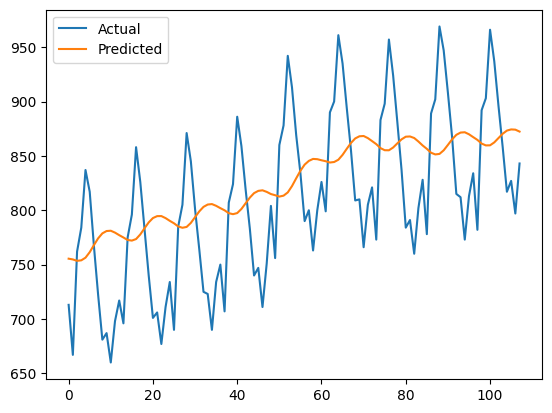

In [14]:
plt.plot(scaler.inverse_transform(y.reshape(-1, 1)), label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.show()


# **Second Code**

In [15]:
# Mount Google Drive (if your data is there)
# from google.colab import drive
# drive.mount('/content/drive')

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For hyperparameter search
!pip install -q keras-tuner
import kerastuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


/tmp/ipython-input-15-785774065.py:20: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Index(['Month', 'Production'], dtype='object')


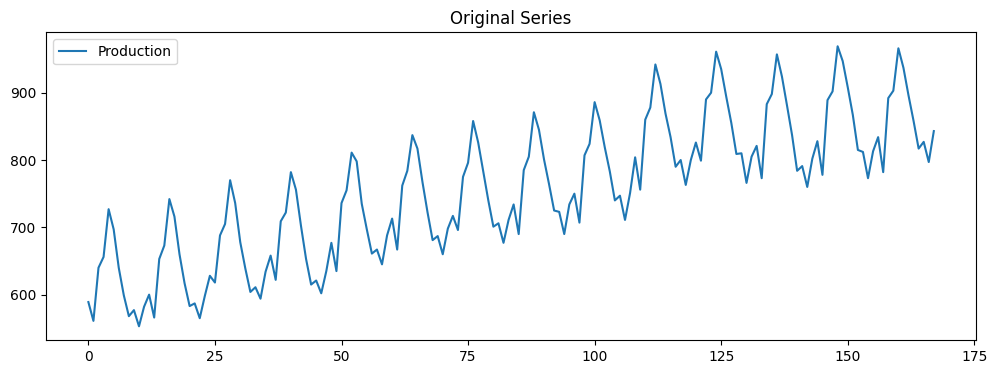

In [18]:
# Replace with your path
df = pd.read_csv('/content/sample_data/milk_production.csv')

# Check the columns in the dataframe to find the correct date column name
print(df.columns)
df.plot(figsize=(12,4), title='Original Series')
plt.show()
# Once the correct column name is identified, replace 'date' with the correct name
# df = pd.read_csv('/content/sample_data/milk_production.csv', parse_dates=['Date'], index_col='Date')
# df.plot(figsize=(12,4), title='Original Series')
# plt.show()

In [20]:
# 3.1 Scaling
scaler = MinMaxScaler()
values = scaler.fit_transform(df[['Production']])

# 3.2 Sequence builder
def make_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i : i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 30
X, y = make_sequences(values, seq_len)

# 3.3 Train/Test split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:
def build_baseline():
    model = Sequential([
        LSTM(50, input_shape=(seq_len, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_baseline()
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=2
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 3s - 842ms/step - loss: 0.1989 - val_loss: 0.3162 - learning_rate: 1.0000e-03
Epoch 2/100
3/3 - 0s - 59ms/step - loss: 0.1172 - val_loss: 0.1550 - learning_rate: 1.0000e-03
Epoch 3/100
3/3 - 0s - 83ms/step - loss: 0.0570 - val_loss: 0.0443 - learning_rate: 1.0000e-03
Epoch 4/100
3/3 - 0s - 47ms/step - loss: 0.0236 - val_loss: 0.0286 - learning_rate: 1.0000e-03
Epoch 5/100
3/3 - 0s - 47ms/step - loss: 0.0328 - val_loss: 0.0439 - learning_rate: 1.0000e-03
Epoch 6/100
3/3 - 0s - 43ms/step - loss: 0.0358 - val_loss: 0.0258 - learning_rate: 1.0000e-03
Epoch 7/100
3/3 - 0s - 44ms/step - loss: 0.0264 - val_loss: 0.0225 - learning_rate: 1.0000e-03
Epoch 8/100
3/3 - 0s - 47ms/step - loss: 0.0225 - val_loss: 0.0301 - learning_rate: 1.0000e-03
Epoch 9/100
3/3 - 0s - 50ms/step - loss: 0.0242 - val_loss: 0.0356 - learning_rate: 1.0000e-03
Epoch 10/100
3/3 - 0s - 50ms/step - loss: 0.0253 - val_loss: 0.0355 - learning_rate: 1.0000e-03
Epoch 11/100
3/3 - 0s - 46ms/step - loss: 0.0248 - val_loss:

In [22]:
def build_advanced(units=64, dropout_rate=0.2, bidirectional=False):
    model = Sequential()
    if bidirectional:
        model.add(Bidirectional(LSTM(units, return_sequences=True), input_shape=(seq_len,1)))
        model.add(Dropout(dropout_rate))
        model.add(Bidirectional(LSTM(units)))
    else:
        model.add(LSTM(units, return_sequences=True, input_shape=(seq_len,1)))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

adv_model = build_advanced(units=128, dropout_rate=0.3, bidirectional=True)
adv_history = adv_model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 - 9s - 3s/step - loss: 0.1279 - val_loss: 0.1123 - learning_rate: 1.0000e-03
Epoch 2/100
3/3 - 1s - 204ms/step - loss: 0.0536 - val_loss: 0.0220 - learning_rate: 1.0000e-03
Epoch 3/100
3/3 - 1s - 213ms/step - loss: 0.0277 - val_loss: 0.0751 - learning_rate: 1.0000e-03
Epoch 4/100
3/3 - 1s - 200ms/step - loss: 0.0395 - val_loss: 0.0519 - learning_rate: 1.0000e-03
Epoch 5/100
3/3 - 1s - 206ms/step - loss: 0.0281 - val_loss: 0.0221 - learning_rate: 1.0000e-03
Epoch 6/100
3/3 - 1s - 203ms/step - loss: 0.0251 - val_loss: 0.0244 - learning_rate: 1.0000e-03
Epoch 7/100
3/3 - 1s - 219ms/step - loss: 0.0282 - val_loss: 0.0209 - learning_rate: 1.0000e-03
Epoch 8/100
3/3 - 1s - 421ms/step - loss: 0.0223 - val_loss: 0.0267 - learning_rate: 1.0000e-03
Epoch 9/100
3/3 - 1s - 194ms/step - loss: 0.0220 - val_loss: 0.0303 - learning_rate: 1.0000e-03
Epoch 10/100
3/3 - 1s - 201ms/step - loss: 0.0239 - val_loss: 0.0239 - learning_rate: 1.0000e-03
Epoch 11/100
3/3 - 1s - 212ms/step - loss:

In [29]:
def model_builder(hp):
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_dropout = hp.Float('dropout', 0.1, 0.5, step=0.1)
    hp_bi = hp.Boolean('bidirectional')

    model = build_advanced(units=hp_units, dropout_rate=hp_dropout, bidirectional=hp_bi)
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=10,
    directory='lstm_tuner',
    project_name='time_series'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[es], verbose=1)

best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from lstm_tuner/time_series/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
MAE: 24.044, RMSE: 30.789


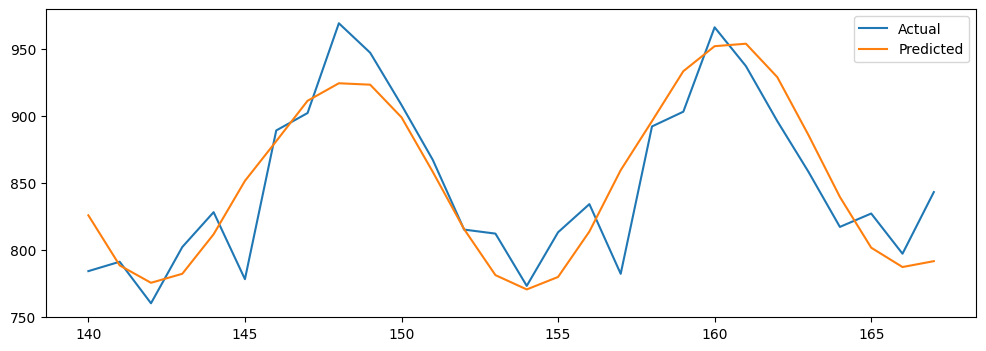

In [30]:
# Predict
preds = best_model.predict(X_test)
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

# Metrics
mae = mean_absolute_error(y_test_inv, preds_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, preds_inv))

print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}')

# Plot
plt.figure(figsize=(12,4))
plt.plot(df.index[-len(preds_inv):], y_test_inv, label='Actual')
plt.plot(df.index[-len(preds_inv):], preds_inv, label='Predicted')
plt.legend()
plt.show()